<a href="https://colab.research.google.com/github/EthanZash/Seminario-de-Inteligencia-Artificial-1/blob/main/Hill_Climbing_Mutacion_Aleatoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

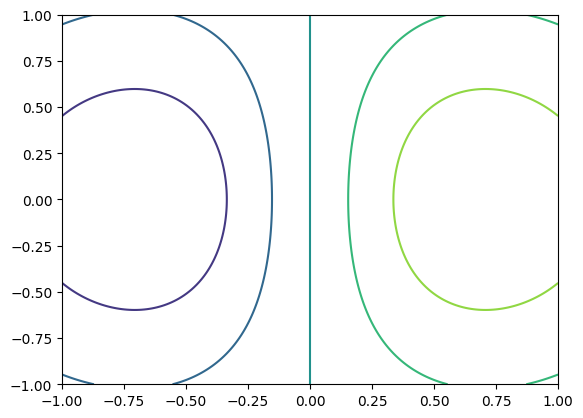

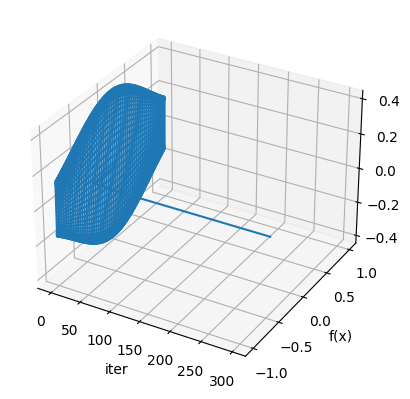

Valores que optimizan la función = -0.6688342033731254 -0.0012624252658874902
Mínimo en = -0.427603094723351


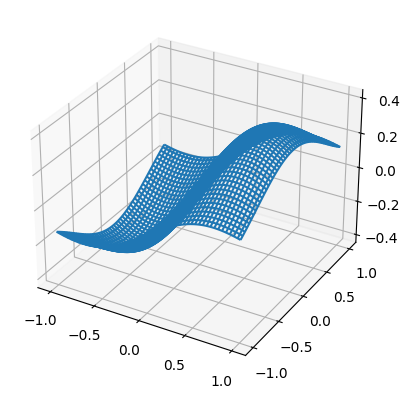

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import random
import copy
from io import BytesIO
from IPython.display import Image

def f(x, y):
    return x * np.exp(-x**2 - y**2)

plotN = 200
x = np.linspace(-1, 1, plotN)
y = np.linspace(-1, 1, plotN)

x, y = np.meshgrid(x, y)
z = f(x, y)

fig = plt.figure()
axis = fig.add_subplot(111, projection='3d')  # Crear un subplot 3D
axis.plot_surface(x, y, z, cmap='jet', shade=False)

# Guardar la figura en un objeto de bytes
buf = BytesIO()
plt.savefig(buf, format='png')
plt.close(fig)

# Mostrar la figura
Image(buf.getvalue())

plt.contour(x, y, z)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Crear un subplot 3D
ax.plot_wireframe(x, y, z)

# Hill Climbing random mutation
iterations = range(1, 300)  # número de iteraciones
dimension = 2
x_lower = np.array([-2, -2])  # cota mínima
x_upper = np.array([2, 2])  # cota máxima

g = np.zeros(len(iterations))

x_test = x_lower + (x_upper - x_lower) * np.array([random.uniform(0, 1), random.uniform(0, 1)])

for i in iterations:
    fx = f(x_test[0], x_test[1])
    j = random.randint(0, 1)
    y_test = copy.copy(x_test)
    y_test[j] = x_lower[j] + (x_upper[j] - x_lower[j]) * random.uniform(0, 1)
    fy = f(y_test[0], y_test[1])
    if fy < fx:
        x_test = copy.copy(y_test)
    g[i - 1] = fx

# reportar resultados

plt.xlabel("iter")
plt.ylabel("f(x)")
plt.plot(iterations, g)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Crear un subplot 3D
ax.plot_wireframe(x, y, z)

print("Valores que optimizan la función =", x_test[0], x_test[1])
print("Mínimo en =", f(x_test[0], x_test[1]))



